In [1]:
!python3 -m pip install --user sklearn
!python3 -m pip install --user seaborn
!python3 -m pip install --user folium
!python3 -m pip install --user statsmodels
!python3 -m pip install --user xlrd

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn as sns

import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm
import math
from sklearn.preprocessing import scale

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg
# Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from math import log
from sklearn import metrics

In [3]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('houseprice_beijing').getOrCreate()

In [6]:
df_hp = pd.read_excel("house_price_beijing_raw.xlsx")

,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318819.000000,318819.000000,3.188190e+05,318819.000000,318819.000000,318819.000000,160849.000000,318819.000000,318819.000000,318819.000000,...,316798.000000,299536.000000,318819.000000,318819.000000,3.188190e+05,318819.000000,318819.000000,318819.000000,318819.000000,318356.000000
mean,116.418483,39.949593,1.129115e+12,2014.784276,6.611723,16.529448,28.826664,16.733187,349.051533,43533.066746,...,3.010057,1999.216021,2.606573,4.451460,6.317120e+01,0.577055,0.645601,0.601112,6.763292,63684.226787
std,0.112031,0.091985,2.363565e+12,1.656269,3.482551,8.741193,50.240049,34.210491,230.779844,21708.374706,...,1.269642,8.777396,1.311575,1.901352,2.506976e+04,0.494028,0.478331,0.489670,2.812366,22328.807086
min,116.072514,39.627030,1.111027e+12,2002.000000,1.000000,1.000000,1.000000,0.000000,0.100000,1.000000,...,1.000000,1906.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,2013.000000,3.000000,9.000000,1.000000,0.000000,205.000000,28052.500000,...,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,2015.000000,7.000000,17.000000,6.000000,5.000000,294.000000,38738.000000,...,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,2016.000000,10.000000,24.000000,37.000000,18.000000,425.500000,53821.000000,...,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,2018.000000,12.000000,31.000000,1677.000000,1143.000000,18130.000000,156250.000000,...,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [7]:
df_hp.describe()

,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318819.000000,318819.000000,3.188190e+05,318819.000000,318819.000000,318819.000000,160849.000000,318819.000000,318819.000000,318819.000000,...,316798.000000,299536.000000,318819.000000,318819.000000,3.188190e+05,318819.000000,318819.000000,318819.000000,318819.000000,318356.000000
mean,116.418483,39.949593,1.129115e+12,2014.784276,6.611723,16.529448,28.826664,16.733187,349.051533,43533.066746,...,3.010057,1999.216021,2.606573,4.451460,6.317120e+01,0.577055,0.645601,0.601112,6.763292,63684.226787
std,0.112031,0.091985,2.363565e+12,1.656269,3.482551,8.741193,50.240049,34.210491,230.779844,21708.374706,...,1.269642,8.777396,1.311575,1.901352,2.506976e+04,0.494028,0.478331,0.489670,2.812366,22328.807086
min,116.072514,39.627030,1.111027e+12,2002.000000,1.000000,1.000000,1.000000,0.000000,0.100000,1.000000,...,1.000000,1906.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,2013.000000,3.000000,9.000000,1.000000,0.000000,205.000000,28052.500000,...,1.000000,1994.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,2015.000000,7.000000,17.000000,6.000000,5.000000,294.000000,38738.000000,...,4.000000,2001.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,2016.000000,10.000000,24.000000,37.000000,18.000000,425.500000,53821.000000,...,4.000000,2006.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,2018.000000,12.000000,31.000000,1677.000000,1143.000000,18130.000000,156250.000000,...,4.000000,2016.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [9]:
df_hp.head(20)

,url,id,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101100261039....,101100261039,116.291921,40.146327,1111043196439,2016,8,31,60.0,1,...,NaN,2011.0,2,6,1.000,0,0,0,6,48793.0
1,https://bj.lianjia.com/chengjiao/BJCY90300669....,BJCY90300669,116.437966,40.018379,1111027382232,2016,3,8,1.0,14,...,NaN,2011.0,4,6,1.000,1,1,0,7,114246.0
2,https://bj.lianjia.com/chengjiao/BJHD89553835....,BJHD89553835,116.287746,40.038617,1111027381142,2015,7,20,NaN,2,...,4.0,2009.0,2,6,0.250,1,0,1,8,92027.0
3,https://bj.lianjia.com/chengjiao/101091290951....,101091290951,116.455694,39.807011,1111027381865,2016,6,16,169.0,36,...,4.0,2002.0,3,6,0.500,0,1,0,4,45246.0
4,https://bj.lianjia.com/chengjiao/101091727210....,101091727210,116.275500,40.036213,1111027376136,2017,1,19,316.0,43,...,NaN,2003.0,4,6,0.500,0,1,1,8,74522.0
5,https://bj.lianjia.com/chengjiao/101092021194....,101092021194,116.317097,39.632299,1111027374277,2016,7,27,100.0,8,...,NaN,2011.0,1,5,1.000,0,0,0,4,31106.0
6,https://bj.lianjia.com/chengjiao/101100413508....,101100413508,116.542335,39.754708,1111027379800,2017,2,8,184.0,37,...,NaN,2008.0,4,5,1.000,0,1,0,3,32802.0
7,https://bj.lianjia.com/chengjiao/101100885924....,101100885924,116.419190,40.150537,1111047627815,2016,12,31,36.0,0,...,NaN,NaN,2,1,1.000,0,0,0,6,29153.0
8,https://bj.lianjia.com/chengjiao/101101119398....,101101119398,116.543161,40.097129,1111041170735,2017,2,7,2.0,10,...,4.0,2013.0,3,6,1.000,1,0,0,13,58692.0
9,https://bj.lianjia.com/chengjiao/BJCP00382717....,BJCP00382717,116.303615,40.090880,1111027377758,2012,12,24,NaN,0,...,NaN,2003.0,1,4,0.500,0,0,0,6,56117.0


In [11]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 28 columns):
url                    318819 non-null object
id                     318819 non-null object
Lng                    318819 non-null float64
Lat                    318819 non-null float64
Cid                    318819 non-null int64
tradeYear              318819 non-null int64
tradeMonth             318819 non-null int64
tradeDay               318819 non-null int64
DOM                    160849 non-null float64
followers              318819 non-null int64
totalPrice             318819 non-null float64
price                  318819 non-null int64
square                 318819 non-null float64
livingRoom             318819 non-null int64
drawingRoom            318819 non-null int64
kitchen                318819 non-null int64
bathRoom               318819 non-null int64
floor                  318819 non-null int64
buildingType           316798 non-null float64
constructionTime    

In [13]:
df_hp.columns.values

array(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeYear', 'tradeMonth',
       'tradeDay', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype=object)

In [14]:
array = df_hp.values
X = array[:,2:28]
Y = array[:,11]

In [15]:
df_hp["kitchen"].describe()

count    318819.000000
mean          0.994338
std           0.106185
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: kitchen, dtype: float64

In [16]:
df_hp.isnull()

,url,id,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [17]:
df_hp["DOM"].fillna(df_hp["DOM"].mean(), inplace = True)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 28 columns):
url                    318819 non-null object
id                     318819 non-null object
Lng                    318819 non-null float64
Lat                    318819 non-null float64
Cid                    318819 non-null int64
tradeYear              318819 non-null int64
tradeMonth             318819 non-null int64
tradeDay               318819 non-null int64
DOM                    318819 non-null float64
followers              318819 non-null int64
totalPrice             318819 non-null float64
price                  318819 non-null int64
square                 318819 non-null float64
livingRoom             318819 non-null int64
drawingRoom            318819 non-null int64
kitchen                318819 non-null int64
bathRoom               318819 non-null int64
floor                  318819 non-null int64
buildingType           316798 non-null float64
constructionTime    

In [18]:
df_hp.head(20)

,url,id,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101100261039....,101100261039,116.291921,40.146327,1111043196439,2016,8,31,60.000000,1,...,NaN,2011.0,2,6,1.000,0,0,0,6,48793.0
1,https://bj.lianjia.com/chengjiao/BJCY90300669....,BJCY90300669,116.437966,40.018379,1111027382232,2016,3,8,1.000000,14,...,NaN,2011.0,4,6,1.000,1,1,0,7,114246.0
2,https://bj.lianjia.com/chengjiao/BJHD89553835....,BJHD89553835,116.287746,40.038617,1111027381142,2015,7,20,28.826664,2,...,4.0,2009.0,2,6,0.250,1,0,1,8,92027.0
3,https://bj.lianjia.com/chengjiao/101091290951....,101091290951,116.455694,39.807011,1111027381865,2016,6,16,169.000000,36,...,4.0,2002.0,3,6,0.500,0,1,0,4,45246.0
4,https://bj.lianjia.com/chengjiao/101091727210....,101091727210,116.275500,40.036213,1111027376136,2017,1,19,316.000000,43,...,NaN,2003.0,4,6,0.500,0,1,1,8,74522.0
5,https://bj.lianjia.com/chengjiao/101092021194....,101092021194,116.317097,39.632299,1111027374277,2016,7,27,100.000000,8,...,NaN,2011.0,1,5,1.000,0,0,0,4,31106.0
6,https://bj.lianjia.com/chengjiao/101100413508....,101100413508,116.542335,39.754708,1111027379800,2017,2,8,184.000000,37,...,NaN,2008.0,4,5,1.000,0,1,0,3,32802.0
7,https://bj.lianjia.com/chengjiao/101100885924....,101100885924,116.419190,40.150537,1111047627815,2016,12,31,36.000000,0,...,NaN,NaN,2,1,1.000,0,0,0,6,29153.0
8,https://bj.lianjia.com/chengjiao/101101119398....,101101119398,116.543161,40.097129,1111041170735,2017,2,7,2.000000,10,...,4.0,2013.0,3,6,1.000,1,0,0,13,58692.0
9,https://bj.lianjia.com/chengjiao/BJCP00382717....,BJCP00382717,116.303615,40.090880,1111027377758,2012,12,24,28.826664,0,...,NaN,2003.0,1,4,0.500,0,0,0,6,56117.0


In [19]:
df_hp.dropna(inplace=True)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 2 to 318818
Data columns (total 28 columns):
url                    297701 non-null object
id                     297701 non-null object
Lng                    297701 non-null float64
Lat                    297701 non-null float64
Cid                    297701 non-null int64
tradeYear              297701 non-null int64
tradeMonth             297701 non-null int64
tradeDay               297701 non-null int64
DOM                    297701 non-null float64
followers              297701 non-null int64
totalPrice             297701 non-null float64
price                  297701 non-null int64
square                 297701 non-null float64
livingRoom             297701 non-null int64
drawingRoom            297701 non-null int64
kitchen                297701 non-null int64
bathRoom               297701 non-null int64
floor                  297701 non-null int64
buildingType           297701 non-null float64
constructionTime    

Text(0.5,1,'Distribution of number of the total price')

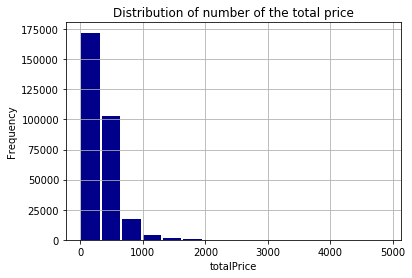

In [20]:
#visualization 1
df_hp["totalPrice"].plot.hist(grid=True, bins=15, rwidth=0.9, color='darkblue')
plt.xlabel('totalPrice')
plt.ylabel('Frequency')
plt.title('Distribution of number of the total price')

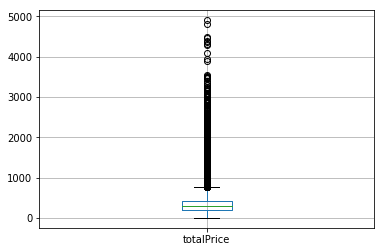

In [21]:
#visualization 3
df_hp.boxplot(column='totalPrice')

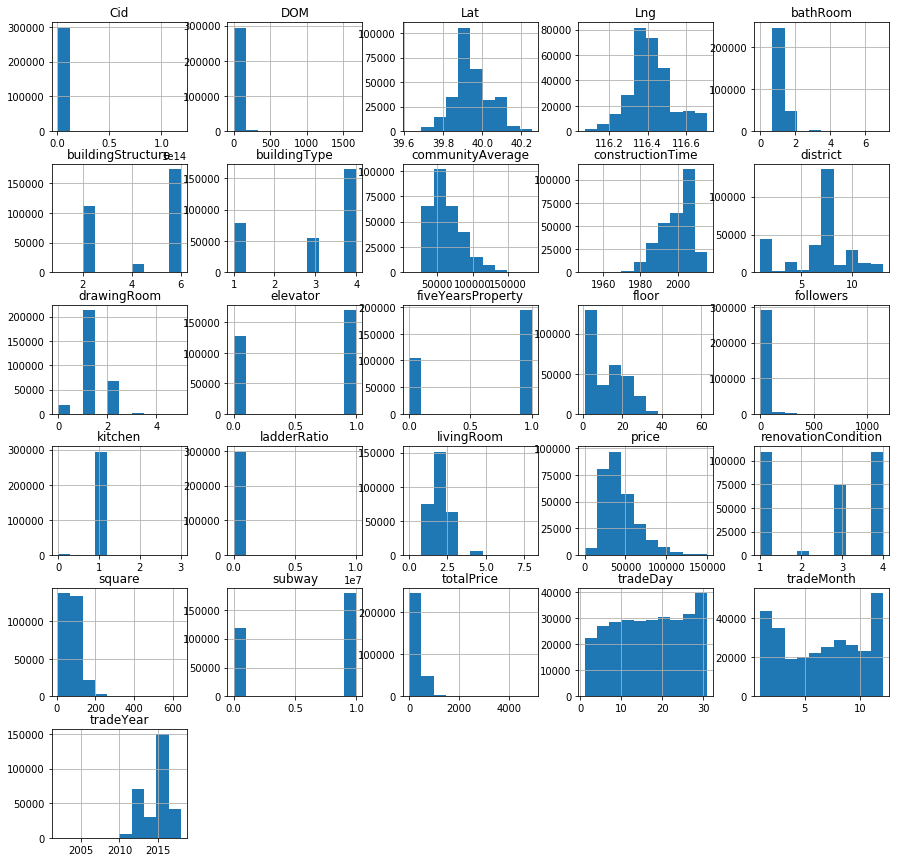

In [22]:
#visualization 4
df_hp.select_dtypes(include=['int64']).columns
df_hp.hist(figsize=(15,15))
plt.show()

Text(0,0.5,'mean of house price')

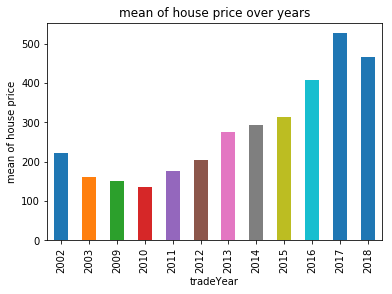

In [23]:
#visualization 5
df_hp_year = df_hp.groupby(['tradeYear'])['totalPrice'].mean()
df_hp_year
df_hp_year.plot.bar()
plt.title('mean of house price over years')
plt.ylabel('mean of house price')

In [24]:
df_hp.describe().astype(np.int64)

,Lng,Lat,Cid,tradeYear,tradeMonth,tradeDay,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701,...,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701
mean,116,39,1126267581784,2014,6,16,29,17,349,43820,...,3,1999,2,4,67,0,0,0,6,63688
std,0,0,1331388340180,1,3,8,36,34,224,21789,...,1,8,1,1,25943,0,0,0,2,22167
min,116,39,1111027373683,2002,1,1,1,0,0,1,...,1,1950,1,1,0,0,0,0,1,10847
25%,116,39,1111027376247,2013,3,9,7,0,205,28224,...,1,1994,1,2,0,0,0,0,6,46505
50%,116,39,1111027378407,2015,7,17,28,5,295,39033,...,4,2001,3,6,0,1,1,1,7,59025
75%,116,40,1111027380579,2016,10,24,28,19,427,54249,...,4,2006,4,6,0,1,1,1,8,75858
max,116,40,118486728773575,2018,12,31,1677,1143,4900,150000,...,4,2016,4,6,10009400,1,1,1,13,183109


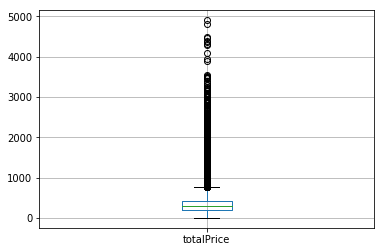

In [25]:
df_hp.boxplot(column='totalPrice')

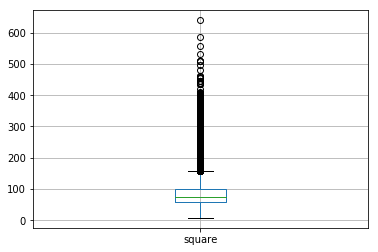

In [26]:
df_hp.boxplot(column='square')

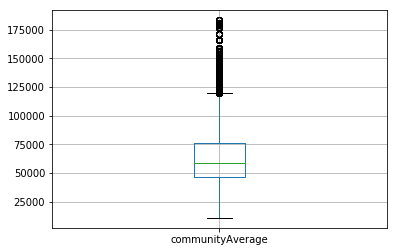

In [27]:
df_hp.boxplot(column='communityAverage')

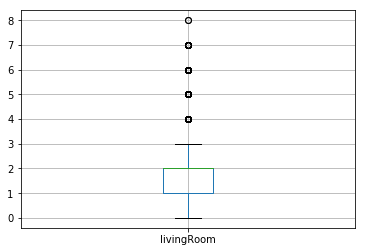

In [28]:
df_hp.boxplot(column='livingRoom')

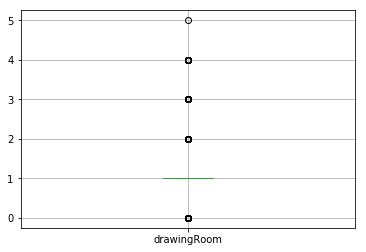

In [29]:
df_hp.boxplot(column='drawingRoom')

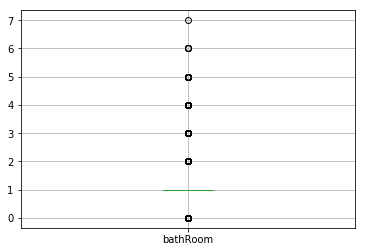

In [30]:
df_hp.boxplot(column='bathRoom')

In [31]:
df_hp.info()
df_hp = df_hp[np.abs(df_hp.totalPrice - df_hp.totalPrice.mean()) <= (3*df_hp.totalPrice.std())]
df_hp = df_hp[np.abs(df_hp.square - df_hp.square.mean()) <= (3*df_hp.square.std())]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 2 to 318818
Data columns (total 28 columns):
url                    297701 non-null object
id                     297701 non-null object
Lng                    297701 non-null float64
Lat                    297701 non-null float64
Cid                    297701 non-null int64
tradeYear              297701 non-null int64
tradeMonth             297701 non-null int64
tradeDay               297701 non-null int64
DOM                    297701 non-null float64
followers              297701 non-null int64
totalPrice             297701 non-null float64
price                  297701 non-null int64
square                 297701 non-null float64
livingRoom             297701 non-null int64
drawingRoom            297701 non-null int64
kitchen                297701 non-null int64
bathRoom               297701 non-null int64
floor                  297701 non-null int64
buildingType           297701 non-null float64
constructionTime    

In [32]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288938 entries, 2 to 318818
Data columns (total 28 columns):
url                    288938 non-null object
id                     288938 non-null object
Lng                    288938 non-null float64
Lat                    288938 non-null float64
Cid                    288938 non-null int64
tradeYear              288938 non-null int64
tradeMonth             288938 non-null int64
tradeDay               288938 non-null int64
DOM                    288938 non-null float64
followers              288938 non-null int64
totalPrice             288938 non-null float64
price                  288938 non-null int64
square                 288938 non-null float64
livingRoom             288938 non-null int64
drawingRoom            288938 non-null int64
kitchen                288938 non-null int64
bathRoom               288938 non-null int64
floor                  288938 non-null int64
buildingType           288938 non-null float64
constructionTime    

In [33]:
hp0 = df_hp
hp0["tradeTime"] = hp0["tradeYear"].map(str)+'/' + hp0["tradeMonth"].map(str) + '/' +hp0["tradeDay"].map(str)
hp0['tradeTime']

2          2015/7/20
17        2016/10/22
64          2013/9/9
66        2014/10/19
119        2016/7/29
130        2016/9/27
143         2016/9/2
232        2017/3/11
236        2017/2/20
246        2017/3/14
251        2017/6/30
312         2015/5/1
325        2016/1/14
397        2014/2/17
428        2015/6/17
440        2016/2/27
460        2016/5/15
484         2016/3/6
489         2013/5/8
490        2013/8/25
501        2016/3/18
502         2016/6/9
531         2012/8/8
532         2012/8/8
536        2013/10/8
537        2013/10/8
545         2016/2/1
551         2016/5/7
552         2016/5/7
574        2016/8/10
             ...    
318742     2015/1/10
318745      2015/2/9
318746     2014/7/26
318747     2014/7/26
318751     2015/4/25
318754      2015/1/7
318755      2015/1/7
318758     2015/3/22
318759      2015/4/7
318763     2015/4/18
318766     2015/7/12
318772     2015/8/11
318779      2016/1/8
318780    2015/11/28
318781    2015/11/27
318783    2015/11/26
318785    201

In [34]:
df_hp_sub = df_hp
df_hp_sub = df_hp_sub.drop(['id', 'url','kitchen', 'price'], axis = 1)
df_hp_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288938 entries, 2 to 318818
Data columns (total 25 columns):
Lng                    288938 non-null float64
Lat                    288938 non-null float64
Cid                    288938 non-null int64
tradeYear              288938 non-null int64
tradeMonth             288938 non-null int64
tradeDay               288938 non-null int64
DOM                    288938 non-null float64
followers              288938 non-null int64
totalPrice             288938 non-null float64
square                 288938 non-null float64
livingRoom             288938 non-null int64
drawingRoom            288938 non-null int64
bathRoom               288938 non-null int64
floor                  288938 non-null int64
buildingType           288938 non-null float64
constructionTime       288938 non-null float64
renovationCondition    288938 non-null int64
buildingStructure      288938 non-null int64
ladderRatio            288938 non-null float64
elevator          

In [35]:
def season(tradeMonth):
    if tradeMonth < 4:
        return 'winter'
    elif tradeMonth < 7:
        return 'spring'
    elif tradeMonth < 10:
        return 'summer'
    else:
        return 'autumn'
df_hp_sub.loc[:, 'season'] = df_hp_sub['tradeMonth'].apply(season)
df_hp_sub[['season','tradeMonth']]

,season,tradeMonth
2,summer,7
17,autumn,10
64,summer,9
66,autumn,10
119,summer,7
130,summer,9
143,summer,9
232,winter,3
236,winter,2
246,winter,3


Text(0,0.5,'count')

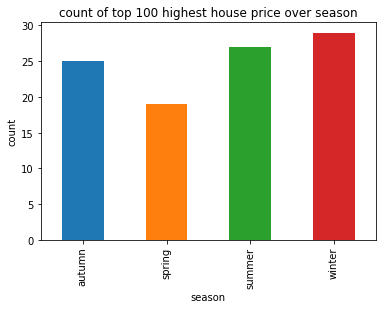

In [36]:
sort = df_hp_sub.sort_values(by='totalPrice', ascending=False).head(100)
sort.groupby(['season'])['totalPrice'].count().plot.bar()
plt.title('count of top 100 highest house price over season')
plt.xlabel('season')
plt.ylabel('count')

In [37]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})